# Harmonic Generation in 2D

In [1]:
import os
import sys
sys.path.append('..')

In [2]:
import numpy as np
from numpy.fft import fft2  # 2D Fourier trafo
import pandas as pd
import matplotlib.pyplot as plt

import get_field_data as gfd

### Note on the Data

Gaussian waves in 2D with $1\mu m$ wavelength that collide at an angle of 135°.
The physical size of the square is $80\mu \times 80\mu m$, the Gaussians meet exactly in the center.
4- and 6-photon processes are simulated on top of the linear vacuum.

### Get the Data

In [3]:
# Data path
scratch_dir = "/project/th-scratch/a/And.Lindner"

# Data folder
folder = "2d_hh_gen"  # 4 processes

Define the parameters for passing to the `get_field_data` function.

In [4]:
# Specifications of the simulation parameters
path = os.path.join(scratch_dir,folder)
component = 2
steps = [50, 100]
n_prc = 4
n_patches = [2, 2]
patch_shape = (512, 512)

In [5]:
ez = gfd.combine_steps(gfd.get_field2D, path, component, n_prc, patch_shape, n_patches, steps=steps)

### Check it out

The lattice has 1024x1024 points.

In [7]:
ez[0].shape

(1024, 1024)

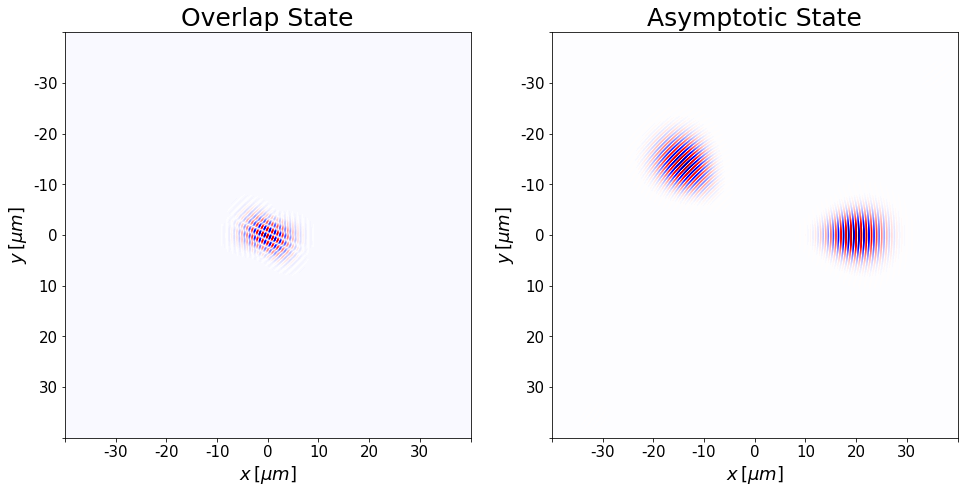

In [8]:
plt.figure(figsize=(16, 9))
for i in range(2):
    plt.subplot(1, 2, i+1)
    if(i == 0):
        plt.title("Overlap State", fontsize=25)
    if(i == 1):
        plt.title("Asymptotic State", fontsize=25)
        
    plt.imshow(np.rot90(ez[i], k=-1), cmap="seismic")  # Rotation to get the correct axes in the imshow plot
    plt.xlabel("$x \, [\mu m]$", size=18)
    plt.ylabel("$y \, [\mu m]$", size=18)
    pos_xs = np.linspace(0, 1024, 9)
    pos_labels = ["", "-30", "-20", "-10", "0", "10", "20", "30", ""]
    plt.xticks(pos_xs,pos_labels, size=15)
    plt.yticks(pos_xs,pos_labels, size=15)
    
plt.show()

### Check out the Harmonics in Frequency Space

After a Fourier transformation, the pulse frequency is located at $\omega_p=80\mu m/1\mu m = 80$. This is thus a convenient unit to use.

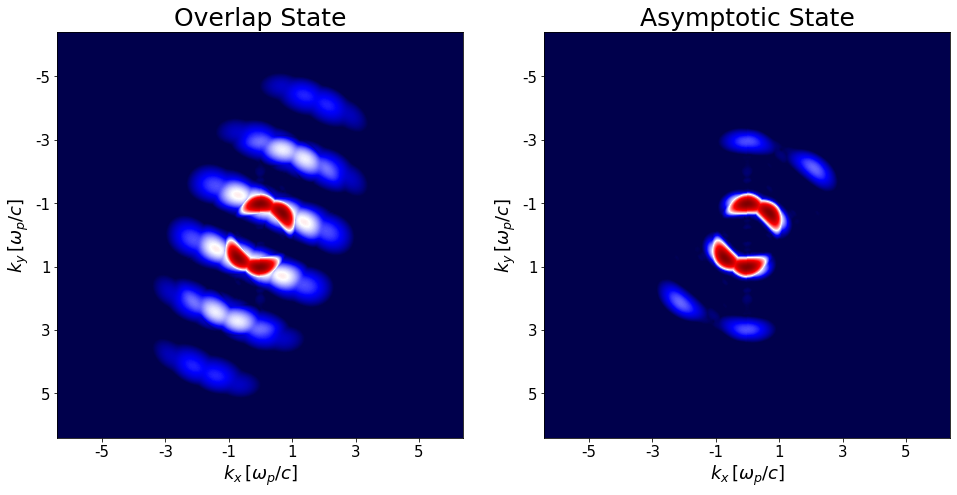

In [12]:
fft2_states = []
plt.figure(figsize=(16, 9))

for i in range(2):
    fft2_states.append(np.fft.fft2(ez[i]))
    fft2_states[i] = 0.1*np.log(np.abs(fft2_states[i])+1e-18)
    fft2_states[i] = np.roll(fft2_states[i], 512)
    fft2_states[i] = np.roll(fft2_states[i], 512, axis=0)  # Roll to center the harmonics
    fft2_states[i] = np.where(fft2_states[i]<-3., -3., fft2_states[i])  # Make contours finer


    plt.subplot(1, 2, i+1)
    if(i == 0):
        plt.title("Overlap State", fontsize=25)
    if(i == 1):
        plt.title("Asymptotic State", fontsize=25)
        
    xs = [(512-400), (512-240), (512-80), (512+80), (512+240), (512+400)]
    labels = ["-5", "-3", "-1", "1", "3", "5"]
    plt.imshow(fft2_states[i], cmap ='seismic')
    plt.xticks(xs, labels, size=15)
    plt.yticks(xs, labels, size=15)
    plt.xlabel("$k_x \, [\omega_p/c]$", size=18)
    plt.ylabel("$k_y \, [\omega_p/c]$", size=18)
    
plt.show()